Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.


The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.
- [ ] After you remove outliers, what is the mean price in your subset of the data?
- [ ] Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR



In [2]:
df0 = pd.read_csv('https://raw.githubusercontent.com/SeanAntosiak/DS-Unit-2-Regression-Classification/master/data/renthop-nyc.csv')
df0.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
df0['interest_level'].unique()

array(['medium', 'low', 'high'], dtype=object)

In [0]:
# creating a dict to change intrest_level to a number

intrDict = {'low' : 0, 'medium': 1, 'high': 2}

In [5]:
df = df0.replace({'interest_level': intrDict})
df['interest_level'].unique()

array([1, 0, 2])

In [6]:
df.dtypes

bathrooms               float64
bedrooms                  int64
created                  object
description              object
display_address          object
latitude                float64
longitude               float64
price                     int64
street_address           object
interest_level            int64
elevator                  int64
cats_allowed              int64
hardwood_floors           int64
dogs_allowed              int64
doorman                   int64
dishwasher                int64
no_fee                    int64
laundry_in_building       int64
fitness_center            int64
pre-war                   int64
laundry_in_unit           int64
roof_deck                 int64
outdoor_space             int64
dining_room               int64
high_speed_internet       int64
balcony                   int64
swimming_pool             int64
new_construction          int64
terrace                   int64
exclusive                 int64
loft                      int64
garden_p

In [0]:
# changes creation column from object to datetime

df['created'] = pd.to_datetime(df['created'],infer_datetime_format=True)

In [8]:
df.dtypes

bathrooms                      float64
bedrooms                         int64
created                 datetime64[ns]
description                     object
display_address                 object
latitude                       float64
longitude                      float64
price                            int64
street_address                  object
interest_level                   int64
elevator                         int64
cats_allowed                     int64
hardwood_floors                  int64
dogs_allowed                     int64
doorman                          int64
dishwasher                       int64
no_fee                           int64
laundry_in_building              int64
fitness_center                   int64
pre-war                          int64
laundry_in_unit                  int64
roof_deck                        int64
outdoor_space                    int64
dining_room                      int64
high_speed_internet              int64
balcony                  

In [9]:
# checking all features to see what to look at

df.columns

Index(['bathrooms', 'bedrooms', 'created', 'description', 'display_address',
       'latitude', 'longitude', 'price', 'street_address', 'interest_level',
       'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
       'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
       'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
       'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
       'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft',
       'garden_patio', 'wheelchair_access', 'common_outdoor_space'],
      dtype='object')

Text(0, 0.5, 'longitude')

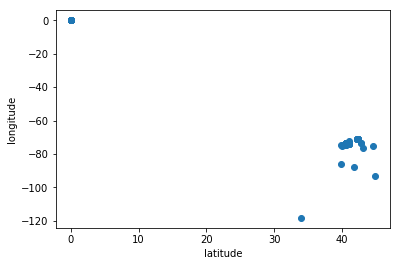

In [10]:
plt.scatter(df['latitude'], df['longitude'])
plt.xlabel('latitude')
plt.ylabel('longitude')

In [11]:
df[df['longitude']==0].head() 

# based on the display_adress, I infer that latitude and longitude were not given and instead just input as 0. 
# so I will not exclude them as outliers

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
2787,5.0,6,2016-04-18 02:14:51,***NO BROKER FEE***<BR><BR>Situated on a gorge...,Decatur Street,0.0,0.0,9995,259 Decatur Street,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
14104,1.0,1,2016-05-31 22:26:06,Gorgeous one bedroom in Sunset Park-Private en...,"Sunset Park, Brooklyn",0.0,0.0,1750,145 28 Street,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21715,1.0,1,2016-06-01 19:59:46,Big 2 bedroom in clean and quite multi family ...,88 van Sicklen street,0.0,0.0,1725,Van Sicklen street,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22471,1.0,2,2016-06-16 15:38:11,Flatiron Duplex!At the intersection of Flatiro...,"Flatiron, Kips Bay, Gramercy",0.0,0.0,4395,219 E 28th,0,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
25860,1.0,2,2016-05-07 08:15:32,Spacious and bright 2 bedroom fully renovated ...,Madison Ave,0.0,0.0,2950,1632 Madison Ave,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


Text(0.5, 0, 'price')

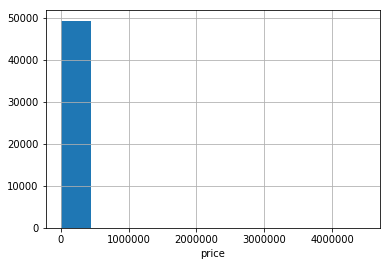

In [12]:
df['price'].hist()
plt.xlabel('price')

Text(0, 0.5, 'price')

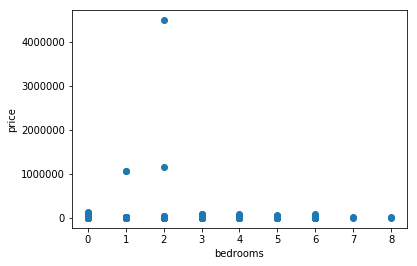

In [13]:
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('bedrooms')
plt.ylabel('price')

In [0]:
# removing outliers with a monthly price above 500,000
df1 = df[df['price']<500000]

Text(0, 0.5, 'price')

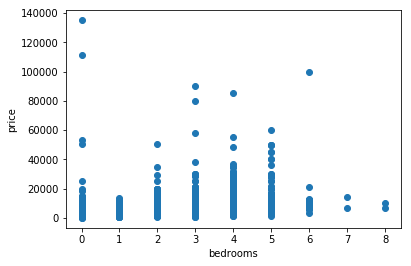

In [15]:
plt.scatter(df1['bedrooms'], df1['price'])
plt.xlabel('bedrooms')
plt.ylabel('price')

Text(0, 0.5, 'count')

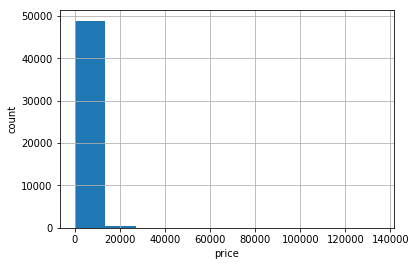

In [16]:
df1['price'].hist()
plt.xlabel('price')
plt.ylabel('count')

# there is still outliers

In [0]:
# removing more outliers with price over $20,000
df2 = df1[df1['price']<20000]

Text(0, 0.5, 'count')

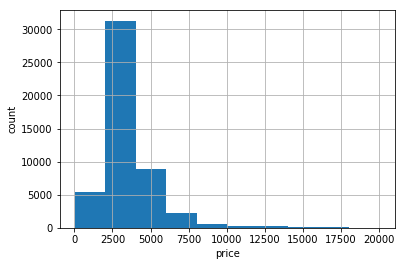

In [18]:
df2['price'].hist()
plt.xlabel('price')
plt.ylabel('count')

# the distribution now resembles more of a normal distribution scewed to the right

In [19]:
# exluding outliers of apartments costing more than $20,000 this gives us a mean of ~$3600 a month
df2['price'].mean()

3599.472530375066

Text(0, 0.5, 'price')

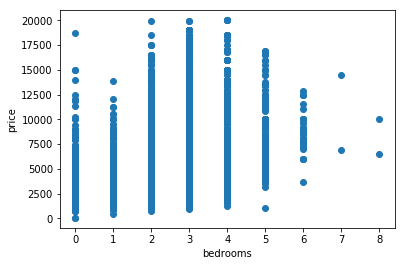

In [20]:
plt.scatter(df2['bedrooms'], df2['price'])
plt.xlabel('bedrooms')
plt.ylabel('price')

In [0]:
# creating a linear model to fit to the data

mod = LR()

feat = ['bedrooms']
targ = 'price'

X = df2[feat]
y = df2[targ]

mod.fit(X, y)

y_pred = mod.predict(X)

Text(0, 0.5, 'price')

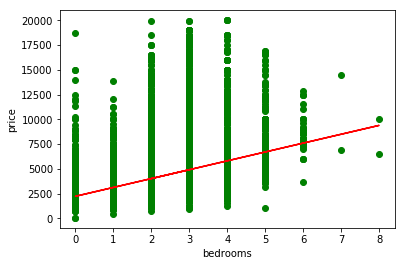

In [22]:
plt.scatter(X, y, color= 'green') # actual data
plt.plot(X, y_pred, color='red') # model predictions
plt.xlabel('bedrooms')
plt.ylabel('price')

In [23]:
print('model coefficient: ', mod.coef_[0])
print('model y intercept: ', mod.intercept_)

# the model suggest that apartments start at around $2200
# and then increase by $900 per aditional bedroom

model coefficient:  894.9485129074661
model y intercept:  2224.8834007527166


In [0]:
# creates a function to predict price based on
# the number of bedrooms

def bedPred(rooms):
  price = mod.intercept_ + rooms*(mod.coef_[0])
  return print(f'The estimated monthly rent for a {rooms} bedroom apartment is ${price:,.0f}');

In [25]:
bedPred(2)

The estimated monthly rent for a 2 bedroom apartment is $4,015


In [26]:
# I will sum up the amenities to see if that corelates better with price
# start by seeing which columns include amenities and how many there are

df2.iloc[:,10:].head() # they start  at this iloc and go to the end

,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
df2.iloc[:,10:].shape # there is 24 different ammenities

(49218, 24)

In [28]:
# creating a column that has the total amenities

df2['amenities'] = 0
for i in range(24):
  df2['amenities'] += df2.iloc[:,10+i];

# Not sure about the errors but this seems to work

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [33]:
df2.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,amenities
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,2,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Text(0, 0.5, 'price')

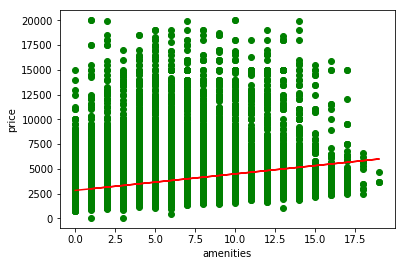

In [38]:
# creating another linear model to fit to the new data

mod1 = LR()

feat1 = ['amenities']
targ1 = 'price'

X1 = df2[feat1]
y1 = df2[targ1]

mod1.fit(X1, y1)

y_pred1 = mod1.predict(X1)

plt.scatter(X1, y1, color= 'green') # actual data
plt.plot(X1, y_pred1, color='red') # model predictions
plt.xlabel('amenities')
plt.ylabel('price')

# seems like its worse, what if we add # of bed/bathrooms?

In [0]:
df3 = df2.copy()
df3['amenities'] = df3['amenities']+df3['bedrooms']+df3['bathrooms']

Text(0, 0.5, 'price')

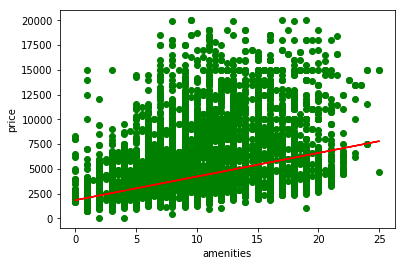

In [45]:
# creating another linear model to fit to the new data

mod2 = LR()

feat2 = ['amenities']
targ2 = 'price'

X2 = df3[feat2]
y2 = df3[targ2]

mod2.fit(X2, y2)

y_pred2 = mod2.predict(X2)

plt.scatter(X2, y2, color= 'green') # actual data
plt.plot(X2, y_pred2, color='red') # model predictions
plt.xlabel('amenities')
plt.ylabel('price')

# maybe a little better but not at first glance
# might need to weigh amenities differently to get meaningful results

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?
- [ ] Do the [Plotly Dash](https://dash.plot.ly/) Tutorial, Parts 1 & 2.

In [30]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

     |████████████████████████████████| 133kB 4.4MB/s 
     |████████████████████████████████| 6.8MB 38.3MB/s 
     |████████████████████████████████| 614kB 36.3MB/s 
     |████████████████████████████████| 225kB 15.6MB/s 
     |████████████████████████████████| 768kB 35.4MB/s 
     |████████████████████████████████| 51kB 19.1MB/s 
     |████████████████████████████████| 194kB 43.0MB/s 
     |████████████████████████████████| 737kB 37.7MB/s 
     |████████████████████████████████| 51kB 9.6MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145036 sha256=980de0b509a2954cad332c4652eb4308efc46ae64da4d2f4e59a8f03fb11170e
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=b0755c134573c344a597e18cec56a9a7e2b9e805d255f8802ef38ecc71f59cdc
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d70

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 25 (delta 7), reused 14 (delta 2), pack-reused 0
Unpacking objects: 100% (25/25), done.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> origin/master


In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)